Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Pre-processing

In [3]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [4]:
df_com['market_value']=df_com.spx

In [6]:
del df_com['dax']
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

In [7]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [8]:
df['returns'] = df.market_value.pct_change(1)*100

In [9]:
df['sq_returns'] = df.returns.mul(df.returns)

Returns vs Squared Returns

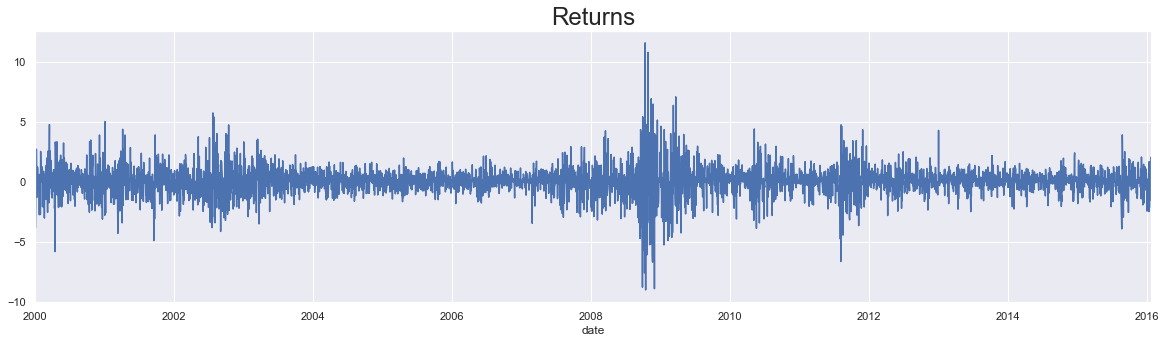

In [10]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

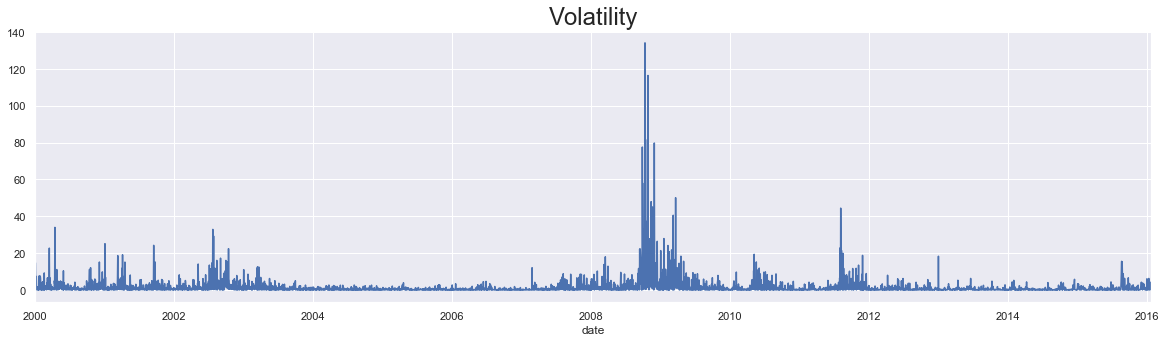

In [11]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

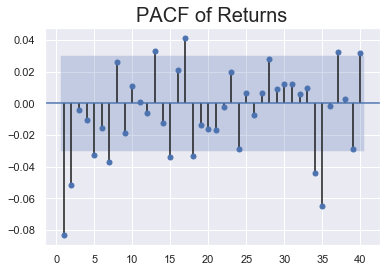

In [12]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

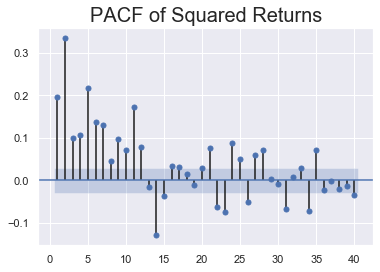

In [13]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

ARCH Model

In [14]:
from arch import arch_model

In [15]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 5929.613774941809
Iteration:     10,   Func. Count:     71,   Neg. LLF: 5926.607327419615
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5926.604007173202
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -5926.60
Distribution:                  Normal   AIC:                           11861.2
Method:            Maximum Likelihood   BIC:                           11886.6
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4187
Time:                        20:21:36   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0503  1.338e-02      3.758  1.712e-04 [2.406e-02,7.650e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0169  4.479e-03      3.781  1.564e-04 [8.155e-03,2.571e-02]
alpha[1]       0.0884  1.087e-02      8.134  4.145e-16   [6.713e-02,  0.110]
beta[1]        0.8990  1.158e-02     77.623      0.000     [  0.876,  0.922]
============================================================================

Covariance estimator: robust
"""

In [16]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 6657.026004439185
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6657.025992535471
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -6657.03
Distribution:                  Normal   AIC:                           13320.1
Method:            Maximum Likelihood   BIC:                           13339.1
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4188
Time:                        20:21:58   Df Model:                            3
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0347  2.050e-02      1.695  9.013e-02 [-5.437e-03,7.491e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.1149  6.658e-02     16.745  6.145e-63 [  0.984,  1.245]
alpha[1]       0.2971  5.364e-02      5.538  3.057e-08 [  0.192,  0.402]
========================================================================

Covariance estimator: robust
"""

In [17]:
model_arch_1 = arch_model(df.returns[1:], mean = "AR", lags = [2, 3, 6], vol = "ARCH", p = 1, dist = "ged")
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     56,   Neg. LLF: 6310.267888856208
Iteration:     10,   Func. Count:    108,   Neg. LLF: 6160.423155219124
Iteration:     15,   Func. Count:    153,   Neg. LLF: 6147.5817470736865
Iteration:     20,   Func. Count:    203,   Neg. LLF: 6147.575526779238
Iteration:     25,   Func. Count:    253,   Neg. LLF: 6147.575162758843
Iteration:     30,   Func. Count:    305,   Neg. LLF: 6147.575039580609
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6147.57503604587
            Iterations: 30
            Function evaluations: 309
            Gradient evaluations: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - ARCH Model Results                                  
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.001
Mean Model:                                    AR   Adj. R-squared:                  0.000
Vol Model:                                   ARCH   Log-Likelihood:               -6147.58
Distribution:      Generalized Error Distribution   AIC:                           12309.2
Method:                        Maximum Likelihood   BIC:                           12353.5
                                                    No. Observations:                 4185
Date:                            Mon, Mar 02 2020   Df Residuals:                     4178
Time:                                    20:23:14   Df Model:                            7
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const           0.0265  6.368e-04     41.584      0.000   [2.523e-02,2.773e-02]
returns[2]     -0.0189  5.030e-04    -37.575 5.574e-309 [-1.989e-02,-1.792e-02]
returns[3] -4.0070e-03  2.646e-04    -15.143  8.415e-52 [-4.526e-03,-3.488e-03]
returns[6] -1.9326e-03  2.654e-04     -7.281  3.319e-13 [-2.453e-03,-1.412e-03]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0025  4.862e-02     20.618  1.895e-94 [  0.907,  1.098]
alpha[1]       0.2798  3.881e-02      7.210  5.595e-13 [  0.204,  0.356]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0100  4.455e-02     22.673 8.366e-114 [  0.923,  1.097]
========================================================================

Covariance estimator: robust
"""

In [18]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 6394.365347491333
Iteration:     10,   Func. Count:     71,   Neg. LLF: 6393.663041761951
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6393.66304176204
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -6393.66
Distribution:                  Normal   AIC:                           12795.3
Method:            Maximum Likelihood   BIC:                           12820.7
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4187
Time:                        20:23:25   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0492  1.764e-02      2.792  5.238e-03 [1.467e-02,8.381e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.7796  5.094e-02     15.304  7.226e-53 [  0.680,  0.879]
alpha[1]       0.1802  3.385e-02      5.322  1.024e-07 [  0.114,  0.247]
alpha[2]       0.3093  4.438e-02      6.971  3.158e-12 [  0.222,  0.396]
========================================================================

Covariance estimator: robust
"""

In [19]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 6242.951414229784
Iteration:     10,   Func. Count:     83,   Neg. LLF: 6239.349358171494
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6239.349345850362
            Iterations: 11
            Function evaluations: 90
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -6239.35
Distribution:                  Normal   AIC:                           12488.7
Method:            Maximum Likelihood   BIC:                           12520.4
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4186
Time:                        20:23:33   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0472  1.567e-02      3.010  2.613e-03 [1.645e-02,7.786e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5711  4.241e-02     13.466  2.495e-41   [  0.488,  0.654]
alpha[1]       0.1101  2.454e-02      4.485  7.297e-06 [6.196e-02,  0.158]
alpha[2]       0.3040  4.557e-02      6.671  2.538e-11   [  0.215,  0.393]
alpha[3]       0.2288  3.351e-02      6.826  8.704e-12   [  0.163,  0.294]
==========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_4 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 4)
results_arch_4 = model_arch_4.fit(update_freq = 5)
results_arch_4.summary()

Iteration:      5,   Func. Count:     50,   Neg. LLF: 6144.771173693631
Iteration:     10,   Func. Count:     96,   Neg. LLF: 6131.4622126057675
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6131.347737573784
            Iterations: 14
            Function evaluations: 129
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -6131.35
Distribution:                  Normal   AIC:                           12274.7
Method:            Maximum Likelihood   BIC:                           12312.7
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4185
Time:                        20:31:54   Df Model:                            6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0535  1.449e-02      3.692  2.226e-04 [2.510e-02,8.192e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4297  4.059e-02     10.587  3.420e-26   [  0.350,  0.509]
alpha[1]       0.0797  2.066e-02      3.857  1.150e-04 [3.919e-02,  0.120]
alpha[2]       0.2242  3.341e-02      6.710  1.952e-11   [  0.159,  0.290]
alpha[3]       0.2227  3.302e-02      6.744  1.541e-11   [  0.158,  0.287]
alpha[4]       0.2250  3.334e-02      6.747  1.506e-11   [  0.160,  0.290]
==========================================================================

Covariance estimator: robust
"""

In [23]:
model_arch_5 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 5)
results_arch_5 = model_arch_5.fit(update_freq = 5)
results_arch_5.summary()

Iteration:      5,   Func. Count:     55,   Neg. LLF: 6065.703337042385
Iteration:     10,   Func. Count:    106,   Neg. LLF: 6055.359652054556
Iteration:     15,   Func. Count:    154,   Neg. LLF: 6054.395061936483
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6054.395061936624
            Iterations: 15
            Function evaluations: 154
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -6054.40
Distribution:                  Normal   AIC:                           12122.8
Method:            Maximum Likelihood   BIC:                           12167.2
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4184
Time:                        20:32:34   Df Model:                            7
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0497  1.449e-02      3.431  6.020e-04 [2.132e-02,7.813e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.3715  3.776e-02      9.838  7.750e-23     [  0.297,  0.446]
alpha[1]       0.0574  2.069e-02      2.775  5.519e-03 [1.686e-02,9.796e-02]
alpha[2]       0.1697  2.672e-02      6.349  2.163e-10     [  0.117,  0.222]
alpha[3]       0.1741  2.656e-02      6.556  5.528e-11     [  0.122,  0.226]
alpha[4]       0.1965  2.989e-02      6.575  4.851e-11     [  0.138,  0.255]
alpha[5]       0.1684  2.687e-02      6.269  3.634e-10     [  0.116,  0.221]
============================================================================

Covariance estimator: robust
"""

In [24]:
model_arch_6 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 6)
results_arch_6 = model_arch_6.fit(update_freq = 5)
results_arch_6.summary()

Iteration:      5,   Func. Count:     61,   Neg. LLF: 6027.828070394538
Iteration:     10,   Func. Count:    117,   Neg. LLF: 6018.391085442975
Iteration:     15,   Func. Count:    172,   Neg. LLF: 6016.70783723205
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6016.707377601438
            Iterations: 17
            Function evaluations: 192
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -6016.71
Distribution:                  Normal   AIC:                           12049.4
Method:            Maximum Likelihood   BIC:                           12100.1
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4183
Time:                        20:35:50   Df Model:                            8
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0535  1.389e-02      3.854  1.161e-04 [2.630e-02,8.073e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.3266  3.078e-02     10.612  2.619e-26     [  0.266,  0.387]
alpha[1]       0.0530  2.254e-02      2.351  1.872e-02 [8.817e-03,9.719e-02]
alpha[2]       0.1561  2.726e-02      5.727  1.025e-08     [  0.103,  0.210]
alpha[3]       0.1620  2.668e-02      6.070  1.280e-09     [  0.110,  0.214]
alpha[4]       0.1753  2.888e-02      6.069  1.290e-09     [  0.119,  0.232]
alpha[5]       0.1367  2.296e-02      5.951  2.661e-09   [9.165e-02,  0.182]
alpha[6]       0.1107  2.808e-02      3.941  8.102e-05   [5.564e-02,  0.166]
============================================================================

Covariance estimator: robust
"""

In [25]:
model_arch_7 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 7)
results_arch_7 = model_arch_7.fit(update_freq = 5)
results_arch_7.summary()

Iteration:      5,   Func. Count:     65,   Neg. LLF: 5985.740399576051
Iteration:     10,   Func. Count:    128,   Neg. LLF: 5979.322897159664
Iteration:     15,   Func. Count:    190,   Neg. LLF: 5977.22630141867
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5977.096860729856
            Iterations: 19
            Function evaluations: 235
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                       ARCH   Log-Likelihood:               -5977.10
Distribution:                  Normal   AIC:                           11972.2
Method:            Maximum Likelihood   BIC:                           12029.3
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4182
Time:                        20:37:20   Df Model:                            9
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0625  1.346e-02      4.641  3.473e-06 [3.609e-02,8.887e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.2843  3.132e-02      9.077  1.119e-19     [  0.223,  0.346]
alpha[1]       0.0507  2.339e-02      2.168  3.016e-02 [4.866e-03,9.657e-02]
alpha[2]       0.1461  2.601e-02      5.618  1.934e-08   [9.513e-02,  0.197]
alpha[3]       0.1476  2.705e-02      5.455  4.888e-08   [9.456e-02,  0.201]
alpha[4]       0.1569  2.754e-02      5.699  1.206e-08     [  0.103,  0.211]
alpha[5]       0.1095  2.039e-02      5.371  7.817e-08   [6.956e-02,  0.149]
alpha[6]       0.0786  1.960e-02      4.009  6.108e-05   [4.016e-02,  0.117]
alpha[7]       0.1333  2.662e-02      5.009  5.482e-07   [8.116e-02,  0.186]
============================================================================

Covariance estimator: robust
"""

In [26]:
model_arch_8 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 8)
results_arch_8 = model_arch_8.fit(update_freq = 5)
results_arch_8.summary()

Iteration:      5,   Func. Count:     71,   Neg. LLF: 5968.8734286486215
Iteration:     10,   Func. Count:    139,   Neg. LLF: 5963.194152947686
Iteration:     15,   Func. Count:    207,   Neg. LLF: 5960.843408404642
Iteration:     20,   Func. Count:    270,   Neg. LLF: 5960.657605178798
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5960.65760185639
            Iterations: 21
            Function evaluations: 282
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -5960.66
Distribution:                  Normal   AIC:                           11941.3
Method:            Maximum Likelihood   BIC:                           12004.7
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4181
Time:                        20:40:09   Df Model:                           10
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0600  1.333e-02      4.501  6.761e-06 [3.388e-02,8.614e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2672  3.111e-02      8.589  8.768e-18      [  0.206,  0.328]
alpha[1]       0.0402  2.158e-02      1.860  6.285e-02 [-2.152e-03,8.245e-02]
alpha[2]       0.1366  2.548e-02      5.360  8.333e-08    [8.662e-02,  0.186]
alpha[3]       0.1341  2.572e-02      5.212  1.866e-07    [8.366e-02,  0.184]
alpha[4]       0.1405  2.770e-02      5.074  3.885e-07    [8.626e-02,  0.195]
alpha[5]       0.0934  1.919e-02      4.866  1.139e-06    [5.576e-02,  0.131]
alpha[6]       0.0697  1.965e-02      3.549  3.870e-04    [3.121e-02,  0.108]
alpha[7]       0.1317  2.701e-02      4.876  1.081e-06    [7.877e-02,  0.185]
alpha[8]       0.0828  2.361e-02      3.506  4.550e-04    [3.650e-02,  0.129]
=============================================================================

Covariance estimator: robust
"""

In [27]:
model_arch_9 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 9)
results_arch_9 = model_arch_9.fit(update_freq = 5)
results_arch_9.summary()

Iteration:      5,   Func. Count:     76,   Neg. LLF: 5955.889928961804
Iteration:     10,   Func. Count:    150,   Neg. LLF: 5951.057940745812
Iteration:     15,   Func. Count:    224,   Neg. LLF: 5949.567796763335
Iteration:     20,   Func. Count:    292,   Neg. LLF: 5949.0947181847705
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5949.094600773751
            Iterations: 22
            Function evaluations: 318
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -5949.09
Distribution:                  Normal   AIC:                           11920.2
Method:            Maximum Likelihood   BIC:                           11989.9
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4180
Time:                        20:40:58   Df Model:                           11
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0582  1.341e-02      4.342  1.409e-05 [3.195e-02,8.453e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2492  2.931e-02      8.503  1.844e-17      [  0.192,  0.307]
alpha[1]       0.0385  2.186e-02      1.759  7.853e-02 [-4.388e-03,8.130e-02]
alpha[2]       0.1314  2.578e-02      5.098  3.440e-07    [8.090e-02,  0.182]
alpha[3]       0.1225  2.390e-02      5.128  2.925e-07    [7.571e-02,  0.169]
alpha[4]       0.1204  2.715e-02      4.433  9.273e-06    [6.716e-02,  0.174]
alpha[5]       0.0883  1.875e-02      4.709  2.486e-06    [5.155e-02,  0.125]
alpha[6]       0.0627  1.910e-02      3.284  1.025e-03    [2.529e-02,  0.100]
alpha[7]       0.1189  2.704e-02      4.395  1.107e-05    [6.586e-02,  0.172]
alpha[8]       0.0810  2.280e-02      3.551  3.834e-04    [3.629e-02,  0.126]
alpha[9]       0.0763  2.427e-02      3.142  1.676e-03    [2.869e-02,  0.124]
=============================================================================

Covariance estimator: robust
"""

In [28]:
model_arch_10 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 10)
results_arch_10 = model_arch_10.fit(update_freq = 5)
results_arch_10.summary()

Iteration:      5,   Func. Count:     82,   Neg. LLF: 5946.877940143985
Iteration:     10,   Func. Count:    161,   Neg. LLF: 5941.11289206963
Iteration:     15,   Func. Count:    238,   Neg. LLF: 5938.010442044294
Iteration:     20,   Func. Count:    315,   Neg. LLF: 5937.3897742960735
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5937.362070573607
            Iterations: 24
            Function evaluations: 371
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -5937.36
Distribution:                  Normal   AIC:                           11898.7
Method:            Maximum Likelihood   BIC:                           11974.8
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4179
Time:                        20:44:49   Df Model:                           12
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0540  1.368e-02      3.950  7.812e-05 [2.722e-02,8.083e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2350  2.721e-02      8.639  5.694e-18      [  0.182,  0.288]
alpha[1]       0.0273  1.954e-02      1.396      0.163 [-1.103e-02,6.558e-02]
alpha[2]       0.1284  2.630e-02      4.882  1.049e-06    [7.685e-02,  0.180]
alpha[3]       0.1133  2.308e-02      4.907  9.235e-07    [6.804e-02,  0.159]
alpha[4]       0.1137  2.681e-02      4.239  2.244e-05    [6.111e-02,  0.166]
alpha[5]       0.0796  1.839e-02      4.331  1.487e-05    [4.360e-02,  0.116]
alpha[6]       0.0596  1.859e-02      3.208  1.338e-03  [2.319e-02,9.606e-02]
alpha[7]       0.1153  2.728e-02      4.228  2.353e-05    [6.188e-02,  0.169]
alpha[8]       0.0617  2.132e-02      2.894  3.799e-03    [1.993e-02,  0.104]
alpha[9]       0.0778  2.404e-02      3.238  1.202e-03    [3.073e-02,  0.125]
alpha[10]      0.0718  2.295e-02      3.130  1.750e-03    [2.684e-02,  0.117]
=============================================================================

Covariance estimator: robust
"""

In [29]:
model_arch_11 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 11)
results_arch_11 = model_arch_11.fit(update_freq = 5)
results_arch_11.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 5934.088902337617
Iteration:     10,   Func. Count:    171,   Neg. LLF: 5931.257816817151
Iteration:     15,   Func. Count:    254,   Neg. LLF: 5929.577310000226
Iteration:     20,   Func. Count:    336,   Neg. LLF: 5928.715831314637
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5928.6853186377575
            Iterations: 24
            Function evaluations: 397
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -5928.69
Distribution:                  Normal   AIC:                           11883.4
Method:            Maximum Likelihood   BIC:                           11965.8
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4178
Time:                        20:45:18   Df Model:                           13
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0534  1.341e-02      3.978  6.940e-05 [2.707e-02,7.965e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2200  2.733e-02      8.052  8.152e-16      [  0.166,  0.274]
alpha[1]       0.0277  1.933e-02      1.435      0.151 [-1.015e-02,6.563e-02]
alpha[2]       0.1280  2.550e-02      5.019  5.200e-07    [7.801e-02,  0.178]
alpha[3]       0.0972  2.085e-02      4.661  3.151e-06    [5.631e-02,  0.138]
alpha[4]       0.1015  2.545e-02      3.986  6.714e-05    [5.157e-02,  0.151]
alpha[5]       0.0745  1.824e-02      4.088  4.359e-05    [3.880e-02,  0.110]
alpha[6]       0.0513  1.850e-02      2.773  5.555e-03  [1.504e-02,8.755e-02]
alpha[7]       0.1150  2.804e-02      4.103  4.086e-05    [6.008e-02,  0.170]
alpha[8]       0.0576  2.100e-02      2.745  6.059e-03  [1.647e-02,9.878e-02]
alpha[9]       0.0647  2.359e-02      2.742  6.099e-03    [1.846e-02,  0.111]
alpha[10]      0.0770  2.289e-02      3.366  7.630e-04    [3.218e-02,  0.122]
alpha[11]      0.0648  2.269e-02      2.858  4.264e-03    [2.037e-02,  0.109]
=============================================================================

Covariance estimator: robust
"""

In [30]:
model_arch_12 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 12)
results_arch_12 = model_arch_12.fit(update_freq = 5)
results_arch_12.summary()

Iteration:      5,   Func. Count:     90,   Neg. LLF: 5933.253456499995
Iteration:     10,   Func. Count:    179,   Neg. LLF: 5925.644850823197
Iteration:     15,   Func. Count:    268,   Neg. LLF: 5924.726305107494
Iteration:     20,   Func. Count:    357,   Neg. LLF: 5924.080226432647
Iteration:     25,   Func. Count:    441,   Neg. LLF: 5924.025944550805
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5924.025944551103
            Iterations: 25
            Function evaluations: 441
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -5924.03
Distribution:                  Normal   AIC:                           11876.1
Method:            Maximum Likelihood   BIC:                           11964.8
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4177
Time:                        20:45:45   Df Model:                           14
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0552  1.335e-02      4.134  3.562e-05 [2.903e-02,8.137e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2051  2.660e-02      7.713  1.233e-14      [  0.153,  0.257]
alpha[1]       0.0266  1.929e-02      1.380      0.168 [-1.120e-02,6.443e-02]
alpha[2]       0.1276  2.563e-02      4.980  6.345e-07    [7.740e-02,  0.178]
alpha[3]       0.0982  2.107e-02      4.662  3.130e-06    [5.694e-02,  0.140]
alpha[4]       0.1011  2.468e-02      4.095  4.215e-05    [5.270e-02,  0.149]
alpha[5]       0.0697  1.820e-02      3.832  1.270e-04    [3.407e-02,  0.105]
alpha[6]       0.0442  1.823e-02      2.424  1.533e-02  [8.469e-03,7.995e-02]
alpha[7]       0.1082  2.726e-02      3.970  7.196e-05    [5.478e-02,  0.162]
alpha[8]       0.0498  2.157e-02      2.310  2.090e-02  [7.544e-03,9.208e-02]
alpha[9]       0.0631  2.337e-02      2.702  6.892e-03    [1.734e-02,  0.109]
alpha[10]      0.0743  2.279e-02      3.261  1.110e-03    [2.965e-02,  0.119]
alpha[11]      0.0663  2.305e-02      2.878  4.002e-03    [2.116e-02,  0.112]
alpha[12]      0.0454  2.236e-02      2.029  4.242e-02  [1.552e-03,8.922e-02]
=============================================================================

Covariance estimator: robust
"""

In [33]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     95,   Neg. LLF: 5924.568172944356
Iteration:     10,   Func. Count:    189,   Neg. LLF: 5919.990536702281
Iteration:     15,   Func. Count:    284,   Neg. LLF: 5918.288306184149
Iteration:     20,   Func. Count:    377,   Neg. LLF: 5917.666488737139
Iteration:     25,   Func. Count:    467,   Neg. LLF: 5917.509076482142
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5917.50400916075
            Iterations: 28
            Function evaluations: 518
            Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -5917.50
Distribution:                  Normal   AIC:                           11865.0
Method:            Maximum Likelihood   BIC:                           11960.1
                                        No. Observations:                 4191
Date:                Mon, Mar 02 2020   Df Residuals:                     4176
Time:                        20:53:19   Df Model:                           15
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0565  1.333e-02      4.236  2.275e-05 [3.035e-02,8.261e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2016  2.676e-02      7.534  4.930e-14      [  0.149,  0.254]
alpha[1]       0.0243  1.839e-02      1.319      0.187 [-1.178e-02,6.029e-02]
alpha[2]       0.1298  2.573e-02      5.044  4.562e-07    [7.935e-02,  0.180]
alpha[3]       0.0929  2.014e-02      4.614  3.944e-06    [5.345e-02,  0.132]
alpha[4]       0.0969  2.444e-02      3.963  7.394e-05    [4.896e-02,  0.145]
alpha[5]       0.0641  1.806e-02      3.549  3.861e-04  [2.871e-02,9.952e-02]
alpha[6]       0.0439  1.873e-02      2.343  1.915e-02  [7.166e-03,8.058e-02]
alpha[7]       0.1045  2.741e-02      3.811  1.383e-04    [5.074e-02,  0.158]
alpha[8]       0.0414  2.141e-02      1.935  5.297e-02 [-5.315e-04,8.339e-02]
alpha[9]       0.0584  2.301e-02      2.536  1.120e-02    [1.326e-02,  0.103]
alpha[10]      0.0693  2.212e-02      3.131  1.745e-03    [2.590e-02,  0.113]
alpha[11]      0.0576  2.169e-02      2.656  7.906e-03    [1.510e-02,  0.100]
alpha[12]      0.0400  2.304e-02      1.737  8.231e-02 [-5.128e-03,8.520e-02]
alpha[13]      0.0489  1.977e-02      2.471  1.346e-02  [1.011e-02,8.762e-02]
=============================================================================

Covariance estimator: robust
"""